# Import libraries

In [143]:
import os
from re import search
from dfply import *

# Load settings

In [144]:
if search("ricard", os.uname()[1]):
    exec(open('/Users/ricard/gastrulation10x/settings.py').read())
    exec(open('/Users/ricard/gastrulation10x/utils.py').read())
elif search("ebi", os.uname()[1]):
    exec(open('/homes/ricard/gastrulation10x/settings.py').read())
    exec(open('/homes/ricard/gastrulation10x/utils.py').read())
else:
    exit("Computer not recognised")

## Define I/O

In [145]:
io["outdir"] = io["basedir"] + "/..."

## Define options 

scanpy options

In [231]:
# %%capture
# sc.settings.verbosity = 3
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(8, 7), facecolor='white')

In [147]:
opts["stages"] = [
   "E6.5",
   "E6.75",
   "E7.0",
   "E7.25",
   "E7.5",
   "E7.75",
   "E8.0",
   "E8.25",
   "E8.5",
   "mixed_gastrulation"
]

opts["celltypes"] = [
   "Epiblast",
   "Primitive_Streak",
   "Caudal_epiblast",
   "PGC",
   "Anterior_Primitive_Streak",
   "Notochord",
   "Def._endoderm",
   "Gut",
   "Nascent_mesoderm",
   "Mixed_mesoderm",
   "Intermediate_mesoderm",
   "Caudal_Mesoderm",
   "Paraxial_mesoderm",
   "Somitic_mesoderm",
   "Pharyngeal_mesoderm",
   "Cardiomyocytes",
   "Allantois",
   "ExE_mesoderm",
   "Mesenchyme",
   "Haematoendothelial_progenitors",
   "Endothelium",
   "Blood_progenitors_1",
   "Blood_progenitors_2",
   "Erythroid1",
   "Erythroid2",
   "Erythroid3",
   "NMP",
   "Rostral_neurectoderm",
   "Caudal_neurectoderm",
   "Neural_crest",
   "Forebrain_Midbrain_Hindbrain",
   "Spinal_cord",
   "Surface_ectoderm",
   "Visceral_endoderm",
   "ExE_endoderm",
   "ExE_ectoderm",
   "Parietal_endoderm"
]

## Load cell metadata

In [157]:
metadata = (pd.read_table(io["metadata"]) >>
    mask(X.stripped==False, X.doublet==False) >>
    mask(X["stage"].isin(opts["stages"]), X.celltype.isin(opts["celltypes"])) >>
    drop("celltype2","celltype3","sequencing.batch","doublet","stripped")
)
metadata.shape

(116312, 7)

In [158]:
metadata.head()

,cell,barcode,sample,stage,celltype,umapX,umapY
0,cell_1,AAAGGCCTCCACAA,1,E6.5,Epiblast,-10.227546,-2.881687
1,cell_2,AACAAACTCGCCTT,1,E6.5,Primitive_Streak,-6.625458,0.108961
2,cell_5,AACAGAGAATCAGC,1,E6.5,ExE_ectoderm,10.061009,-0.029313
3,cell_6,AACATATGAATCGC,1,E6.5,Epiblast,-10.454418,-0.269452
4,cell_8,AACCGATGGCTTCC,1,E6.5,Epiblast,-11.047206,-2.205269


# Load anndata object

In [238]:
io["anndata"] = "/hps/nobackup2/research/stegle/users/ricard/gastrulation10x/processed/adata_with_meta.h5"

In [239]:
adata = load_adata(
    adata_file = io["anndata"], 
#    cells = metadata.cell.values, 
    normalise = True, 
    filter_lowly_expressed_genes = True
)
adata

filtered out 32001 genes that are detected in less than 10 counts
/nfs/research1/stegle/users/ricard/conda-envs/R4/lib/python3.8/site-packages/pandas-1.2.0-py3.8-linux-x86_64.egg/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
normalizing counts per cell
    finished (0:00:01)


AnnData object with n_obs × n_vars = 89267 × 21800
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_counts'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [240]:
adata.obs.head()

,barcode,sample,stage,sequencing.batch,theiler,doub.density,doublet,cluster,cluster.sub,cluster.stage,...,haem_subclust,endo_gephiX,endo_gephiY,endo_trajectoryName,endo_trajectoryDPT,endo_gutX,endo_gutY,endo_gutDPT,endo_gutCluster,cell_velocyto_loom
index,,,,,,,,,,,,,,,,,,,,,
cell_1,AAAGGCCTCCACAA,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AAAGGCCTCCACAAx
cell_2,AACAAACTCGCCTT,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACAAACTCGCCTTx
cell_6,AACATATGAATCGC,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACATATGAATCGCx
cell_8,AACCGATGGCTTCC,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACCGATGGCTTCCx
cell_9,AACGTGTGCTCTAT,1,E6.5,1,TS9,1.146369,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACGTGTGCTCTATx


# Dimensionality reduction

Run PCA

In [197]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:02:05)


Plot PCA

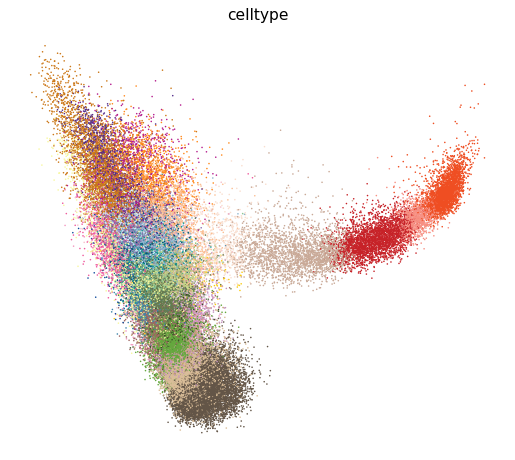

In [232]:
sc.pl.pca(adata, components=[1,2], color="celltype", size=8, legend_loc=None)

Build kNN graph

In [219]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50


KeyboardInterrupt: 

Add precomputed UMAP coordinates

In [228]:
adata.obsm["X_umap"] = adata.obs.loc[:,["umapX","umapY"]].to_numpy()

Run UMAP

In [ ]:
sc.tl.umap(adata, min_dist=0.5)

Plot UMAP

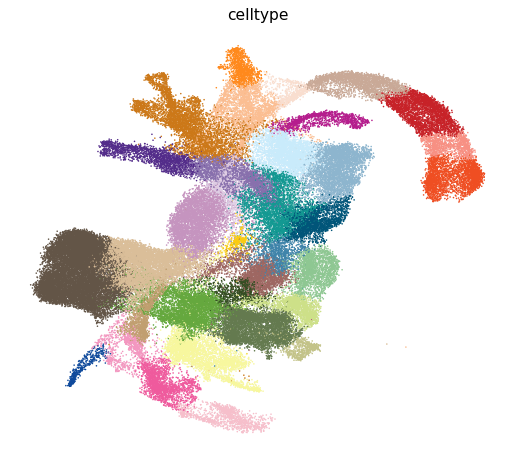

In [233]:
sc.pl.umap(adata, color="celltype", size=8, legend_loc=None)

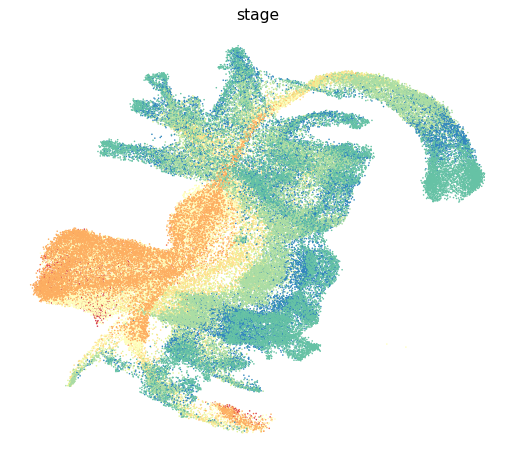

In [234]:
sc.pl.umap(adata, color="stage", size=8, legend_loc=None)